##1. Explain the reasons in your own words the following graphs 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


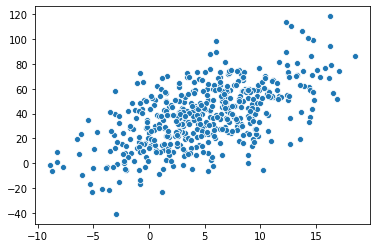

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(0)

#Defining the variables
x = np.random.normal(5,5,500)
y = 3*x + 20 + np.random.normal(5,20,500)
sns.scatterplot(x,y)
plt.show()

In [ ]:
#Defining the array with X and Y
arr = np.vstack([x,y]).T

In [ ]:
#Getting the Covariance and Correlation Matrix
covar_mat = pd.DataFrame(arr).cov()
correl_mat = pd.DataFrame(arr).corr()

In [ ]:
covar_mat

,0,1
0,24.957839,70.893700
1,70.893700,582.048165


In [ ]:
correl_mat

,0,1
0,1.0000,0.5882
1,0.5882,1.0000


In [ ]:
 def plot_pca_2D(arr, symm_mat, cov_mat=True):
   n_comp = 2
   mean_x, mean_y = (np.mean(arr[:,0]), np.mean(arr[:,1]))
   print(mean_x, mean_y)
   plt.figure(figsize=(6,6))

   if cov_mat:
     eigen_val, eigen_vec = np.linalg.eig(symm_mat)
     plt.scatter(arr[:,0],arr[:,1], alpha=0.3, s=10)
     plt.quiver(np.array([mean_x,mean_x]),np.array([mean_y,mean_y]),eigen_vec[:,0], eigen_vec[:,1],color=['r','black'], scale=eigen_val*0.5)
     plt.show()
   else:
     cor = symm_mat
     eigen_val, eigen_vec = np.linalg.eig(symm_mat)
     plt.scatter(arr[:,0],arr[:,1], alpha=0.3, s=10)
     plt.quiver(np.array([mean_x,mean_x]),np.array([mean_y,mean_y]),eigen_vec[:,0], eigen_vec[:,1],color=['r','black'], scale=eigen_val*5)
     plt.show()

4.873227803337831 38.31650389705435


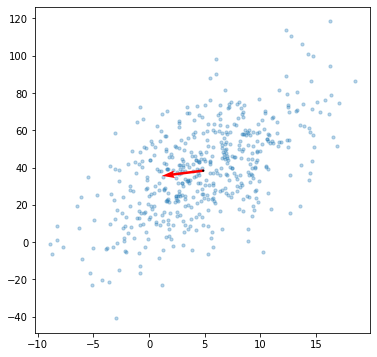

In [ ]:
 plot_pca_2D(arr, symm_mat=covar_mat)

4.873227803337831 38.31650389705435


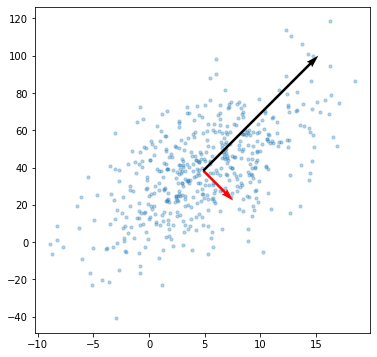

In [ ]:
plot_pca_2D(arr, symm_mat=correl_mat, cov_mat=False)

In [ ]:
print("For X :Standard Dev: ",np.std(x)," Max: ",np.max(x))

For X :Standard Dev:  4.990783886714629  Max:  18.481120262817896


In [ ]:
print("For Y :Standard Dev: ",np.std(y)," Max: ",np.max(y))

For Y :Standard Dev:  24.10153663735621  Max:  118.36973909423833


In [ ]:
pd.DataFrame(arr).head()

,0,1
0,13.820262,74.115434
1,7.000786,45.317513
2,9.893690,76.608007
3,16.204466,68.929082
4,14.337790,61.064357


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_arr = sc.fit_transform(arr)

In [ ]:
pd.DataFrame(scaled_arr).describe()

,0,1
count,5.000000e+02,5.000000e+02
mean,-1.970646e-18,9.436896e-18
std,1.001002e+00,1.001002e+00
min,-2.752311e+00,-3.279395e+00
25%,-6.660480e-01,-6.514499e-01
50%,-2.284141e-02,3.077786e-02
75%,6.944956e-01,6.679804e-01
max,2.726604e+00,3.321499e+00


In [ ]:
covar_mat_scaled = pd.DataFrame(scaled_arr).cov()
correl_mat_scaled = pd.DataFrame(scaled_arr).corr()

In [ ]:
covar_mat_scaled 

,0,1
0,1.002004,0.589378
1,0.589378,1.002004


In [ ]:
correl_mat_scaled

,0,1
0,1.0000,0.5882
1,0.5882,1.0000


In [ ]:
eigen_val, eigen_vec = np. linalg. eig(covar_mat)
print(eigen_val)

[ 16.07766503 590.92833906]


In [ ]:
eigen_val, eigen_vec = np. linalg. eig(correl_mat)
print(eigen_val)

[1.58819955 0.41180045]


In [ ]:
eigen_val, eigen_vec = np. linalg. eig(covar_mat_scaled)
print(eigen_val)

[1.59138232 0.4126257 ]


In [ ]:
eigen_val, eigen_vec = np. linalg. eig(correl_mat_scaled)
print(eigen_val)

[1.58819955 0.41180045]


-7.105427357601002e-18 7.105427357601002e-18


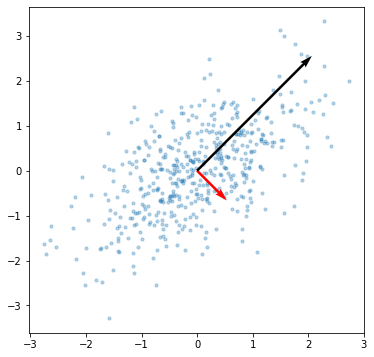

In [ ]:
 plot_pca_2D(scaled_arr, symm_mat=covar_mat_scaled)

-7.105427357601002e-18 7.105427357601002e-18


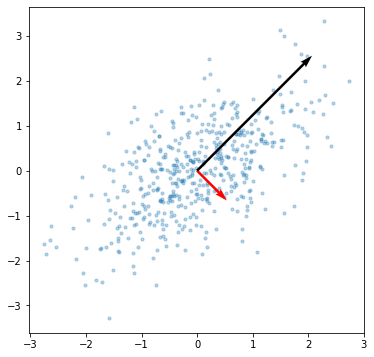

In [ ]:
 plot_pca_2D(scaled_arr, symm_mat=correl_mat_scaled,cov_mat=False)

Conclusion: While we were plotting the PCA plot of the array with unscalled data we were getting different graphs direction for correlation and covariance but in case of Linear Regression it should be same where correlation stands for strength and direction and covariance denotes the direction of the linear relationship. So we check for the statistics of the array and scalaled the data according and check the eigen vector and eigen values which stands true as both are same. Plotted the scalled correlation and covariance matrix and got the directional vector of the both the matrix to be true.

________________________________________________________________________________

##2. You are given a dataset which was generated using exponential distribution. Find out the model parameters to extract the pattern using MLE. Write a simple python program to solve the problem

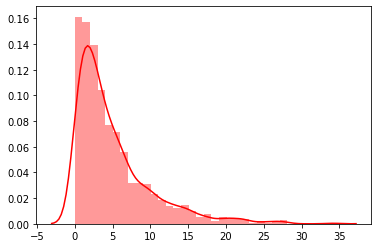

In [ ]:
np.random.seed(123)
exp_data = np.random.exponential(5,size=1000)
sns.distplot(exp_data,color='r')
plt.show()

The above plot shows a decreasing exponential graph, from the formulae of MLE as below


In [ ]:
#As the hyperparameter of exponential distribution is λ and according to the formulae we can compute the following
exp_lambda = (len(exp_data)/np.sum(exp_data))
exp_lambda

0.20033937963435872

So the Maximum Likelihood Estimator of the given exponential distribution λ = 0.20033937963435872

_____________________________________________________________________________

##3.There are two biased coins available. You can choose any one of the coins and toss it for 20 times.The outcomes are to be recorded. The problem is, the coins cannot be differentiated from each other and hence you cannot know which coin was chosen and tossed for 20 times in a particular experiment. Assume that the experiment was run 50 times and you have got the full information about the outcome. Try to estimate the probability of success of each coin (head = success). 
The outcomes are generated using the codes below. Use your own python codes from scratch.

In [ ]:
np.random.seed(123)
r1 = np.random.binomial(1,0.7,(25,20)) # p for one of the coins is 0.7
r2 = np.random.binomial(1,0.4,(25,20)) # p for the other coins is 0.4
outcome = np.vstack([r1,r2])
np.random.shuffle(outcome)
outcome[:5,:]

array([[1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1]])

In [ ]:
#Using the scipy library for creating binomial pmf
from scipy.stats import binom 
# converting the 0's and 1's to "H" & "T"
outcome_new = np.where(outcome == 1,'H', outcome)
outcome_new= np.where(outcome_new == '0','T', outcome_new)

In [ ]:
# Assigning a random theta a & theta b
theta_a = 0.5
theta_b = 0.4
theta = {'A': theta_a, 'B': theta_b}

# Creating the UDF for the EM caluculation
def exp_max(theta_old, outcome_new):
    prob_row = [] 
## Expectation Calculation
    for times in outcome_new:
        count_heads = np.count_nonzero(times=='H')
        prob_a = binom.pmf(count_heads, len(times), theta_old['A'])
        prob_b = binom.pmf(count_heads, len(times), theta_old['B'])
        
        #normalize the probability 
        corr_prob_a = prob_a/(prob_a+prob_b)
        corr_prob_b = prob_b/(prob_a+prob_b)
        prob_row.append({'A': corr_prob_a, 'B': corr_prob_b, 'count_heads': count_heads, 'total_tosses': len(times)})
    
## Maximisation Calculation
    new_coin_toss = []
    for row in prob_row:
        total_tosses = row['total_tosses']
        total_heads = row['count_heads']
        heads_a = row['A']*total_heads
        tails_a = row['A']*(total_tosses-total_heads)
        heads_b = row['B']*total_heads
        tails_b = row['B']*(total_tosses-total_heads)
        new_coin_toss.append([heads_a, tails_a, heads_b, tails_b])

#Creating a Dataframe to view all Head's and Tail's value for reference
    df_new = pd.DataFrame(new_coin_toss, columns=['A Heads', 'A Tails', 'B Heads', 'B Tails'])
    new_prob_a = df_new['A Heads'].sum()/(df_new['A Heads'].sum()+df_new['A Tails'].sum())
    new_prob_b = df_new['B Heads'].sum()/(df_new['B Heads'].sum()+df_new['B Tails'].sum())
    new_theta = {'A': new_prob_a, 'B': new_prob_b}
    
    display(df_new.head())
    return new_theta

In [ ]:
ite = 0
diff_a = 1
diff_b=1
tol = 1e-5

while(abs(diff_a)>tol) and (abs(diff_b)>tol):
    new_theta = exp_max(theta, outcome_new)
    new_theta_l1 = list(new_theta)
    theta_l1 = list(theta)
    d3 = {key: new_theta[key] - theta.get(key, 0) for key in new_theta}
    error = list(d3.items())
    diff_a = error[0][1]
    diff_b= error[1][1]
    theta = new_theta
    
    if(ite>10000):
        break
    ite+=1 

In [ ]:
print("Probability using the EM Algorithm :",theta)

Probability using the EM Algorithm : {'A': 0.7151361232979876, 'B': 0.385755940132841}


We defined a UDF for EM and iterated over 10000 times and let it converge over the error rate 10^-5. We initialed the probability parameter for binomial distribution of the two coins to be 0.5 and 0.4 randomly.
We ittared over it and got a value as similar to the one we defined the probability that 0.7 and 0.4.

#4.Take any dataset of you choice (at least 10k data points) and take any one of the following models:
• SVM

• GBM

• Xgboost

• Random Forest

and vary one hyperparameter at a time to estimate training error and validation error. Vary 5
such hyperparameters to plot 5x2 lineplots for training error and validation error. Based on the
line plots, can you infer anythin?

We are using Random Forest on Analysing California Housing Prices:

dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/housing/



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
files.upload()

Saving Housing Dataset.csv to Housing Dataset.csv


{'Housing Dataset.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\r\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\r\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\r\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\r\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\r\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\r\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\r\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\r\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\r\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\r\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\r\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\r\n-122.26,37.85,52.0,3503.0,752.0,1504.0,7

In [ ]:
housing = pd.read_csv("Housing Dataset.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Descriptive Statistics - Exploring Dataset - Categorical Variable first
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
#Descriptive Statistics - Exploring Dataset - Continuous variables
print(housing.describe())

          longitude      latitude  ...  median_income  median_house_value
count  20640.000000  20640.000000  ...   20640.000000        20640.000000
mean    -119.569704     35.631861  ...       3.870671       206855.816909
std        2.003532      2.135952  ...       1.899822       115395.615874
min     -124.350000     32.540000  ...       0.499900        14999.000000
25%     -121.800000     33.930000  ...       2.563400       119600.000000
50%     -118.490000     34.260000  ...       3.534800       179700.000000
75%     -118.010000     37.710000  ...       4.743250       264725.000000
max     -114.310000     41.950000  ...      15.000100       500001.000000

[8 rows x 9 columns]


In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# As the attribute total_bedrooms has some missing value lets substitute blank spaces with median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [ ]:
dummies = pd.get_dummies(data=housing['ocean_proximity'])
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [ ]:
housing = pd.concat([housing.drop(labels='ocean_proximity',axis=1),dummies],axis=1)

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [ ]:
X = housing.iloc[:,[0,1,2,3,4,5,6,7,9,10,11,12]]
Y = housing.iloc[:,8]

In [ ]:
#Feature Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
tree = RandomForestRegressor()
param_grid = {'bootstrap': [True],'max_depth': [80, 90, 100, 110],'max_features': [2, 3],'min_samples_leaf': [3, 4, 5],'min_samples_split': [8, 10, 12],'n_estimators': [100, 200, 300, 1000]}
grid_search = GridSearchCV(estimator = tree, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X=X,y=Y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 63.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 86.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

In [ ]:
tree = RandomForestRegressor(bootstrap=True,max_depth=80,max_features=3,min_samples_leaf=3,min_samples_split=10)

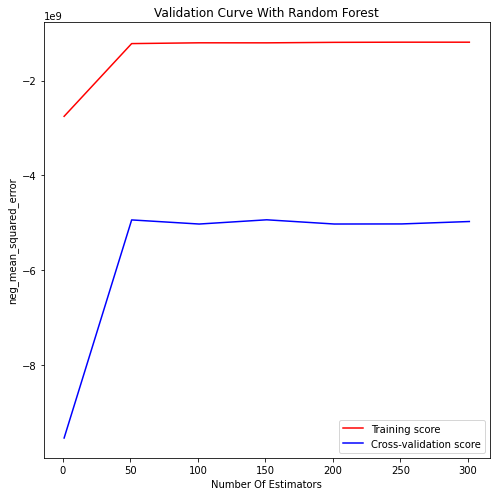

In [ ]:
from sklearn.model_selection import validation_curve  
param_range = np.arange(1, 350, 50)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(tree,
                                  X, Y, param_name="n_estimators", param_range=param_range,
                                  cv=4, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate mean for training set scores
train_mean = np.mean(train_scores, axis=1)
# Calculate mean for test set scores
test_mean = np.mean(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Estimators")
plt.ylabel("neg_mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

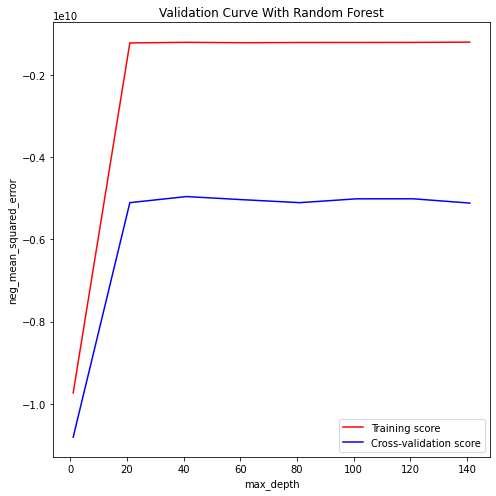

In [ ]:
param_range = np.arange(1, 160, 20)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(tree,
                                  X, Y, param_name="max_depth", param_range=param_range,
                                  cv=4, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate mean for training set scores
train_mean = np.mean(train_scores, axis=1)
# Calculate mean for test set scores
test_mean = np.mean(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("max_depth")
plt.ylabel("neg_mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

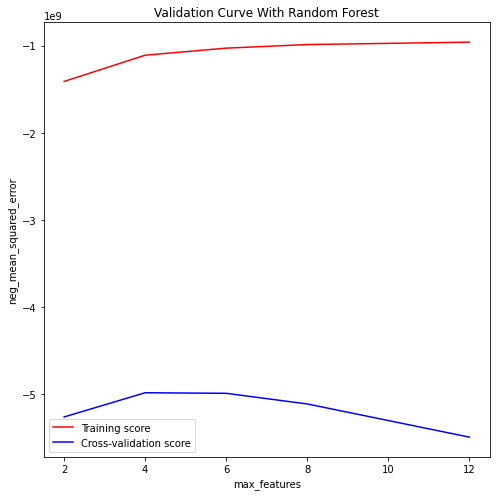

In [ ]:
param_range = np.array([2,4,6,8,12,14])

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(tree,
                                  X, Y, param_name="max_features", param_range=param_range,
                                  cv=4, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate mean for training set scores
train_mean = np.mean(train_scores, axis=1)
# Calculate mean for test set scores
test_mean = np.mean(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("max_features")
plt.ylabel("neg_mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

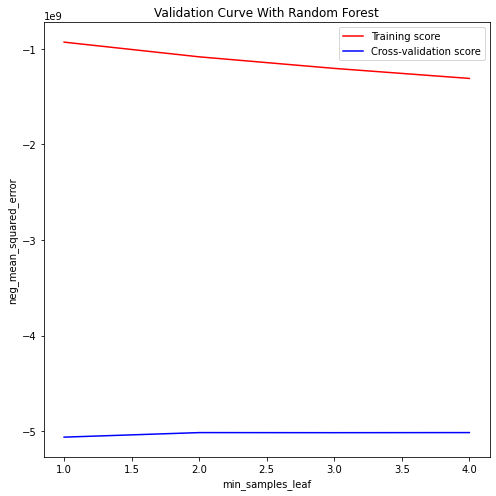

In [ ]:
param_range = np.array([1,2,3,4])

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(tree,
                                  X, Y, param_name="min_samples_leaf", param_range=param_range,
                                  cv=4, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate mean for training set scores
train_mean = np.mean(train_scores, axis=1)
# Calculate mean for test set scores
test_mean = np.mean(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("min_samples_leaf")
plt.ylabel("neg_mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

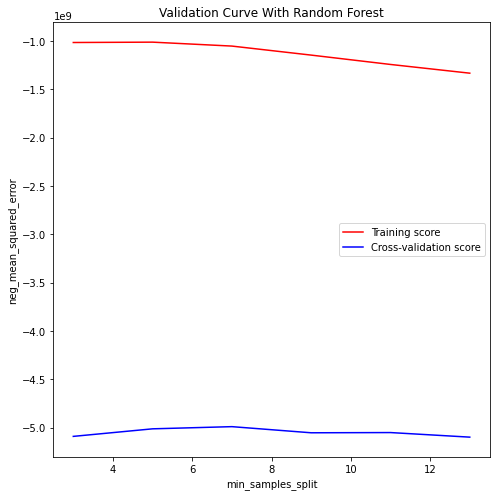

In [ ]:
param_range = np.arange(1,15,2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(tree,
                                  X, Y, param_name="min_samples_split", param_range=param_range,
                                  cv=4, scoring="neg_mean_squared_error", n_jobs=-1)

# Calculate mean for training set scores
train_mean = np.mean(train_scores, axis=1)
# Calculate mean for test set scores
test_mean = np.mean(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="red")
plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("min_samples_split")
plt.ylabel("neg_mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

I took a dataset from UCI Machine Learning Repository of House Pricing and did prediction on the House pricing using Random Forest.

Did data pre-processing on the data and imputed missing data with median,dummy variables were created in place of categorial variables.

Used GridSearchCV to get the best parameters:
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 300}

 We Took the following 5 hyperparameters:


1. n_estimators
2. max_depth
3. max_features
4. min_samples_leaf
5. min_samples_split


In case of n_estimators we did a train_validation_curve fit in the range (0,300).
We observed that after 50 estimators for both train and validation has the same negetive mean square error

In case of max_depth we did a train_validation_curve fit in the range (0,150).
We observed that after 20 max_depth the train has flat negetive mean square error but in case of validation the negetive mean square error vary but very little over the range

In case of max_features we did a train_validation_curve fit in the range [2,4,6,8,12,14]. We observed in case of train data the negetive mean square error increase by a little bit with increase in features but in case of validation we see for 4 max_features we get the best value of negetive mean square error

In case of min_samples_leaf we did a train_validation_curve fit in the range [1,2,3,4]. We observe as we increase its value the train accuracy decrease slowly but in case of validation it remains flat

In case of min_samples_split we did a train_validation_curve fit in the range (0,14). We observe as we increase its value the train accuracy decrease slowly but in case of validation it remains flat


_______________________________________________________________________________

In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!cp drive/My\ Drive/Colab\ Notebooks/ML_II_Assignment_Sourav_Maji.ipynb ./

In [ ]:
!jupyter nbconvert --to PDF "ML_II_Assignment_Sourav_Maji.ipynb"

[NbConvertApp] Converting notebook ML_II_Assignment_Sourav_Maji.ipynb to PDF
[NbConvertApp] Support files will be in ML_II_Assignment_Sourav_Maji_files/
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Making directory ./ML_II_Assignment_Sourav_Maji_files
[NbConvertApp] Writing 2224855 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbCo